In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
file_path1 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(101┴÷┴í).xlsx'
file_path2 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(102┴÷┴í).xlsx'
file_path3 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(103┴÷┴í).xlsx'
file_path4 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(104┴÷┴í).xlsx'
file_path5 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(105┴÷┴í).xlsx'
file_path6 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(106┴÷┴í).xlsx'
file_path7 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(107┴÷┴í).xlsx'
file_path8 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(108┴÷┴í).xlsx'
file_path9 = '/content/drive/MyDrive/capstone_data/labels/2022-12-01-2023-07-01(109┴÷┴í).xlsx'

In [ ]:
data1 = pd.read_excel(file_path1, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data2 = pd.read_excel(file_path2, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data3 = pd.read_excel(file_path3, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data4 = pd.read_excel(file_path4, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data5 = pd.read_excel(file_path5, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data6 = pd.read_excel(file_path6, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data7 = pd.read_excel(file_path7, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data8 = pd.read_excel(file_path8, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])
data9 = pd.read_excel(file_path9, usecols=['ou','NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'winddirection'])

In [ ]:
data7 = pd.read_excel(file_path7)

<ipython-input-11-4d26d7be5d11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data7.corr()


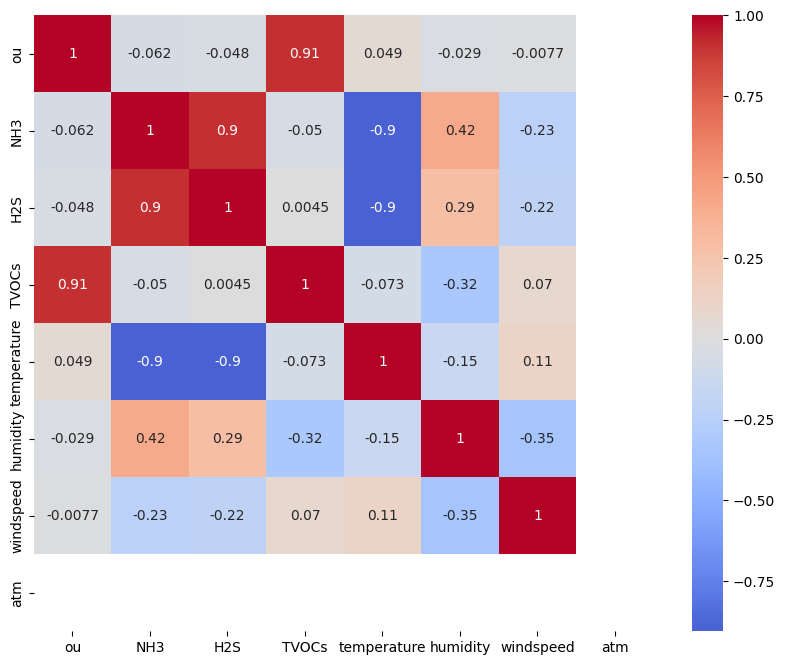

In [ ]:
#heat-map
correlation = data7.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()
df4 = data4.copy()
df5 = data5.copy()
df6 = data6.copy()
df7 = data7.copy()
df8 = data8.copy()
df9 = data9.copy()

In [ ]:
# Function to map wind direction to degrees
def map_direction_to_angle(direction):
    direction_map = {
        '남': 180,      # South
        '남남서': 202.5, # South-Southwest
        '남남동': 157.5, # South-Southeast
        '남서': 225,    # Southwest
        '서남서': 247.5, # West-Southwest
        '서': 270,      # West
        '북북서': 337.5, # North-Northwest
        '북': 0,        # North
        '북서': 315,    # Northwest
        '북북동': 22.5,  # North-Northeast
        '북동': 45,     # Northeast
        '동북동': 67.5,  # East-Northeast
        '서북서': 292.5, # West-Northwest
        '동': 90,       # East
        '동남동': 112.5, # East-Southeast
        '남동': 135,    # Southeast
        '-': np.nan    # Undefined or missing data
    }
    return direction_map.get(direction, np.nan)

In [ ]:
# Apply the mapping to the dataframe
df1['winddirection_angle'] = df1['winddirection'].apply(map_direction_to_angle)

# Convert angles to radians for sine and cosine transformation
df1['winddirection_sin'] = np.sin(np.deg2rad(df1['winddirection_angle']))
df1['winddirection_cos'] = np.cos(np.deg2rad(df1['winddirection_angle']))

# Display the first few rows of the modified dataframe
df1[['winddirection', 'winddirection_angle', 'winddirection_sin', 'winddirection_cos']].head()

,winddirection,winddirection_angle,winddirection_sin,winddirection_cos
0,북,0.0,0.0,1.0
1,북,0.0,0.0,1.0
2,북,0.0,0.0,1.0
3,북,0.0,0.0,1.0
4,북,0.0,0.0,1.0


In [ ]:
df1.drop(axis=1, columns=["winddirection", "winddirection_angle"], inplace=True)

In [ ]:
lower_quantile = df1['ou'].quantile(0.05)  # 1th percentile
upper_quantile = df1['ou'].quantile(0.95)  # 99th percentile

df1['ou'] = df1['ou'].clip(lower=lower_quantile, upper=upper_quantile)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
X = df1.iloc[15000:, 1:].values
y = df1.iloc[15000:, :1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# PCA


In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Instantiate the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.5,
                          grow_policy="lossguide",
                          learning_rate = 0.03,
                          max_depth = 10,
                          alpha = 100,
                          n_estimators = 100,
                          )


In [ ]:
# Train the model
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=100, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Make predictions
predictions = xg_reg.predict(X_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2734732612992324


In [ ]:
def mae(pred, Y):
  residuals = np.subtract(pred, Y)
  print(np.sum(abs(residuals)) / len(Y))

mae(predictions, y_test)

7752.874777416656


In [ ]:
# xg_reg.save_model("/content/drive/MyDrive/capstone_data/models/xgboost.json")

In [ ]:
# demo = xgb.XGBRegressor()
# demo.load_model("/content/drive/MyDrive/capstone_data/models/xgboost.json")

In [ ]:
# demo.predict()

In [ ]:
xg_reg.feature_importances_

array([0.18082803, 0.41538942, 0.10310329, 0.17612804, 0.07652874,
       0.04802248], dtype=float32)

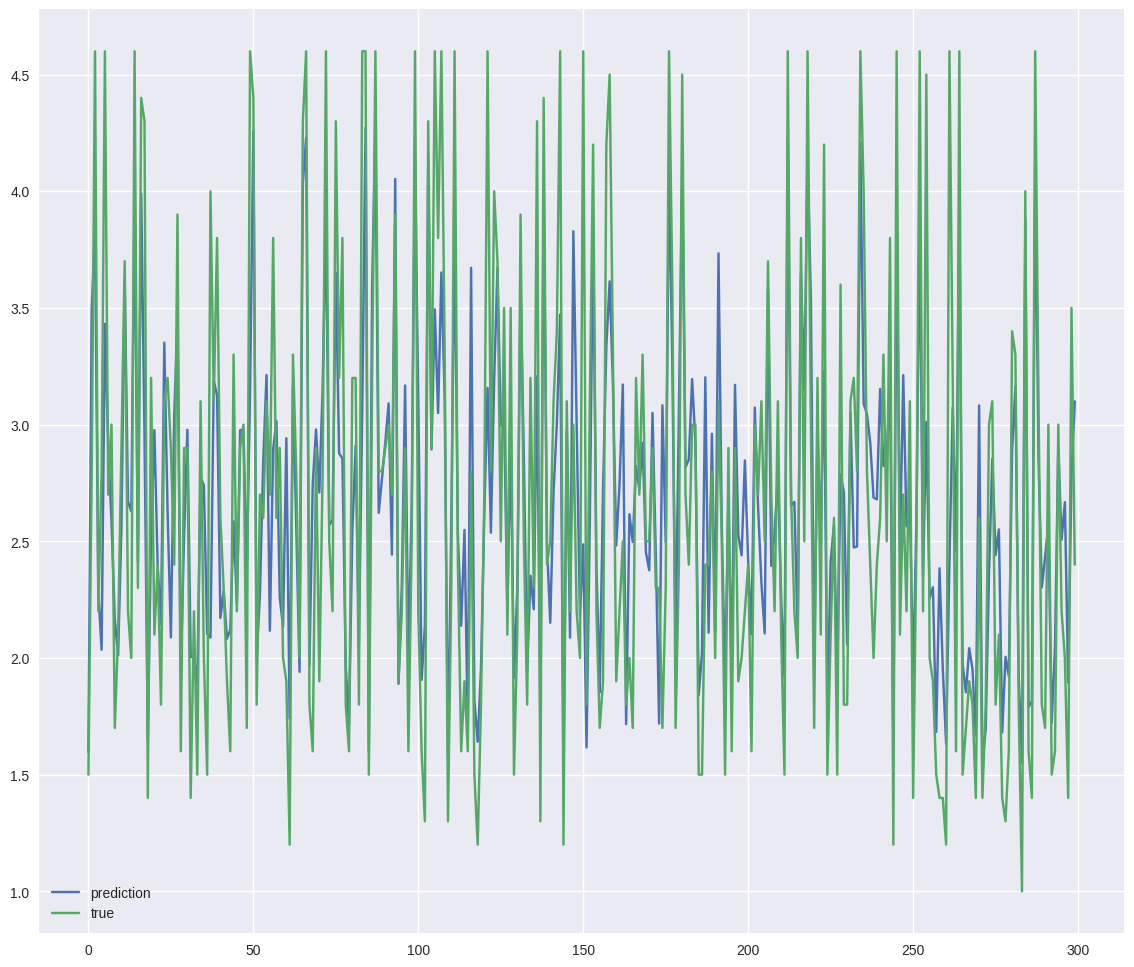

In [ ]:
plt.figure(figsize=(14, 12))
plt.plot( [x for x in range(len(predictions))][:300], predictions[:300], label="prediction")
plt.plot( [x for x in range(len(predictions))][:300], y_test[:300], label="true")
plt.legend(["prediction", "true"])
plt.show()

In [ ]:
df2['winddirection_angle'] = df2['winddirection'].apply(map_direction_to_angle)

# Convert angles to radians for sine and cosine transformation
df2['winddirection_sin'] = np.sin(np.deg2rad(df2['winddirection_angle']))
df2['winddirection_cos'] = np.cos(np.deg2rad(df2['winddirection_angle']))

df2.drop(axis=1, columns=["winddirection", "winddirection_angle"], inplace=True)

In [ ]:
Xq = df2.iloc[15000:, 1:].values
yq = df2.iloc[15000:, :1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xq, yq, test_size = 0.3, random_state = 0)

pred = xg_reg.predict(X_test2)
mse_ = mean_squared_error(y_test2, pred)
print("Mean Squared Error:", mse_)

Mean Squared Error: 2.8358261608781477


In [ ]:
df3['winddirection_angle'] = df3['winddirection'].apply(map_direction_to_angle)

# Convert angles to radians for sine and cosine transformation
df3['winddirection_sin'] = np.sin(np.deg2rad(df3['winddirection_angle']))
df3['winddirection_cos'] = np.cos(np.deg2rad(df3['winddirection_angle']))

df3.drop(axis=1, columns=["winddirection", "winddirection_angle"], inplace=True)

Xq = df3.iloc[15000:, 1:].values
yq = df3.iloc[15000:, :1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xq, yq, test_size = 0.3, random_state = 0)

pred = xg_reg.predict(X_test2)
mse_ = mean_squared_error(y_test2, pred)
print("Mean Squared Error:", mse_)

Mean Squared Error: 2.0707006860906048


In [ ]:
df4['winddirection_angle'] = df4['winddirection'].apply(map_direction_to_angle)

# Convert angles to radians for sine and cosine transformation
df4['winddirection_sin'] = np.sin(np.deg2rad(df4['winddirection_angle']))
df4['winddirection_cos'] = np.cos(np.deg2rad(df4['winddirection_angle']))

df4.drop(axis=1, columns=["winddirection", "winddirection_angle"], inplace=True)

Xq = df4.iloc[15000:, 1:].values
yq = df4.iloc[15000:, :1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xq, yq, test_size = 0.3, random_state = 0)

pred = xg_reg.predict(X_test2)
mse_ = mean_squared_error(y_test2, pred)
print("Mean Squared Error:", mse_)

Mean Squared Error: 1.7687474263989247


#Retrain extra tree


In [ ]:
def retrain_model(model, data):
  # Apply the mapping to the dataframe
  data['winddirection_angle'] = data['winddirection'].apply(map_direction_to_angle)

  # Convert angles to radians for sine and cosine transformation
  data['winddirection_sin'] = np.sin(np.deg2rad(data['winddirection_angle']))
  data['winddirection_cos'] = np.cos(np.deg2rad(data['winddirection_angle']))

  data.drop(axis=1, columns=["winddirection", "winddirection_angle"], inplace=True)
  lower_quantile = data['ou'].quantile(0.05)  # 1th percentile
  upper_quantile = data['ou'].quantile(0.95)  # 99th percentile

  data['ou'] = data['ou'].clip(lower=lower_quantile, upper=upper_quantile)

  X = data.iloc[15000:, 1:].values
  y = data.iloc[15000:, :1].values
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 0)
  # Make predictions
  xg_reg.fit(X_train2, y_train2)


  # Make predictions
  predictions2 = xg_reg.predict(X_test2)
  mse2 = mean_squared_error(y_test2, predictions2)
  r2 = r2_score(predictions2, y_test2)
  return mse2, r2, predictions2


In [ ]:
#data2
mse_2, r2_score_2, predictions_2 = retrain_model(xg_reg, df2)
print(mse_2, r2_score_2)

0.6886245335224707 -0.04696239964879578


In [ ]:
#data3
mse_3, r2_score_3, predictions_3 = retrain_model(xg_reg, df3)
print(mse_3, r2_score_3)

0.4929049353393092 0.18113007689163985


In [ ]:
#data2
mse_4, r2_score_4, predictions_4 = retrain_model(xg_reg, df4)
print(mse_4, r2_score_4)

0.6457319516263647 0.016957077283464406


In [ ]:
#data2
mse_5, r2_score_5, predictions_5 = retrain_model(xg_reg, df5)
print(mse_5, r2_score_5)

0.16566677600258434 -0.37390765253720093


In [ ]:
#data2
mse_6, r2_score_6, predictions_6 = retrain_model(xg_reg, df6)
print(mse_6, r2_score_6)

1.0221103239721057 -0.13063755257762


In [ ]:
#data2
mse_7, r2_score_7, predictions_7 = retrain_model(xg_reg, df7)
print(mse_7, r2_score_7)

0.2893585435314864 -0.019826457466681324


In [ ]:
mse_8, r2_score_8, predictions_8 = retrain_model(xg_reg, df8)
print(mse_8, r2_score_8)

0.12613847728540467 -0.07946807921097432


In [ ]:
mse_9, r2_score_9, predictions_9 = retrain_model(xg_reg, df9)
print(mse_9, r2_score_9)

0.9030528508300594 -0.016801376060079365


In [ ]:
lul =  [x for x in range(len(predictions_9))]

In [ ]:
X = df4.iloc[15000:, 1:].values
y = df4.iloc[15000:, :1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 0)

<ipython-input-92-f2f507b93fa2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Real')

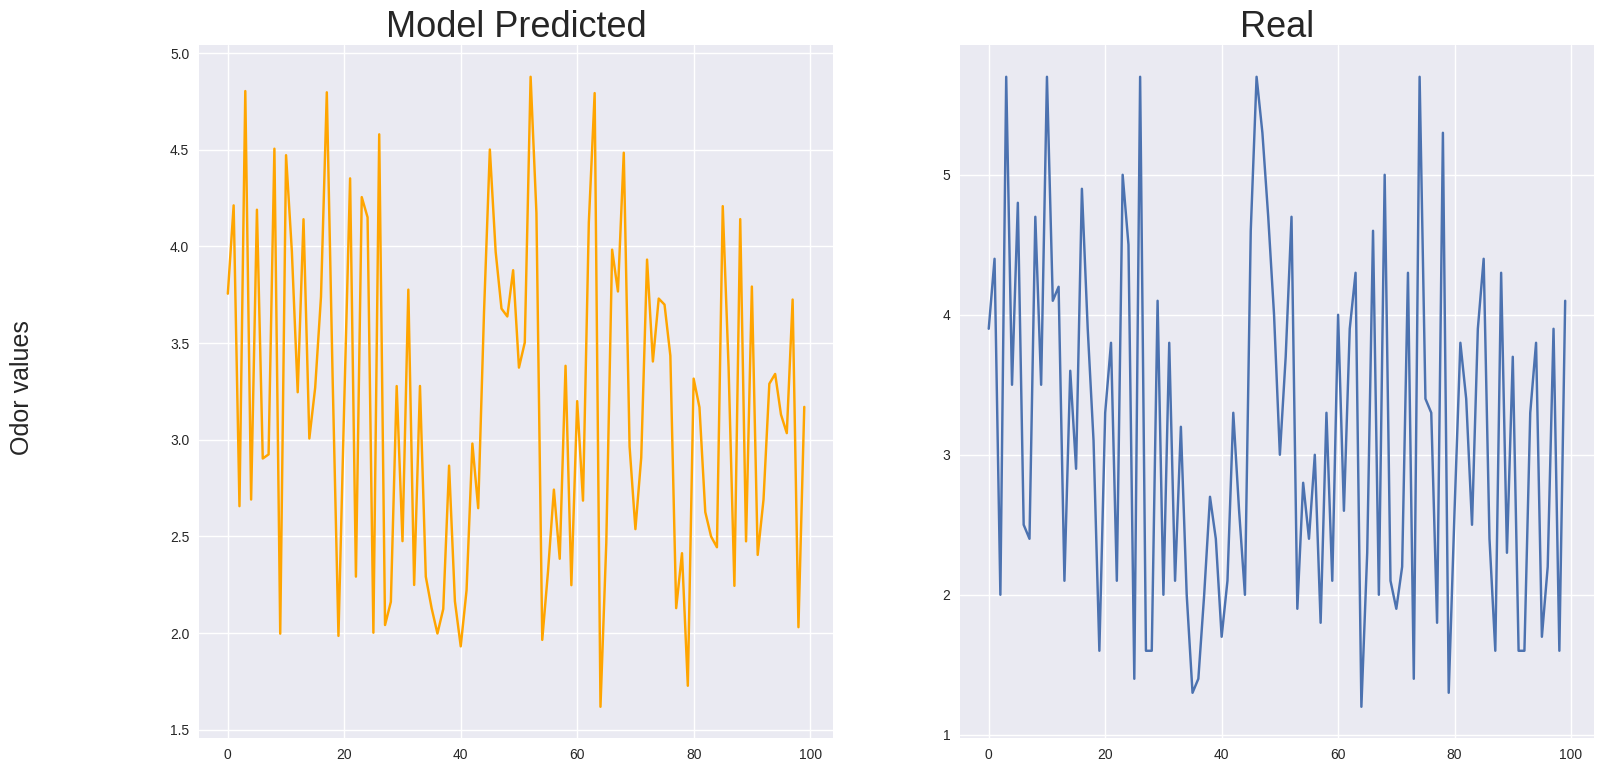

In [ ]:
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1,2)
# fig.suptitle('Predicted vs Real')
fig.supylabel("Odor values", fontsize=18)

fig.set_figheight(9)
fig.set_figwidth(18)

ax1.plot([x for x in range(len(pred))][:100], predictions_4[:100], color="orange")
ax1.set_title("Model Predicted", fontdict={"fontsize":26})

ax2.plot([x for x in range(len(pred))][:100], y_test2[:100])
ax2.set_title("Real", fontdict={"fontsize":26})

#Polynomial


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr = linear_model.LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.712654112089599


In [ ]:
error_linear2 = np.subtract(y_pred, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_linear2 = np.sum(np.square(error_linear2)) / X_test.shape[0]

In [ ]:
cost_linear2

0.9991464629765152

In [ ]:
lul =  [x for x in range(len(y_pred))]

<ipython-input-14-eda0598500c0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Real')

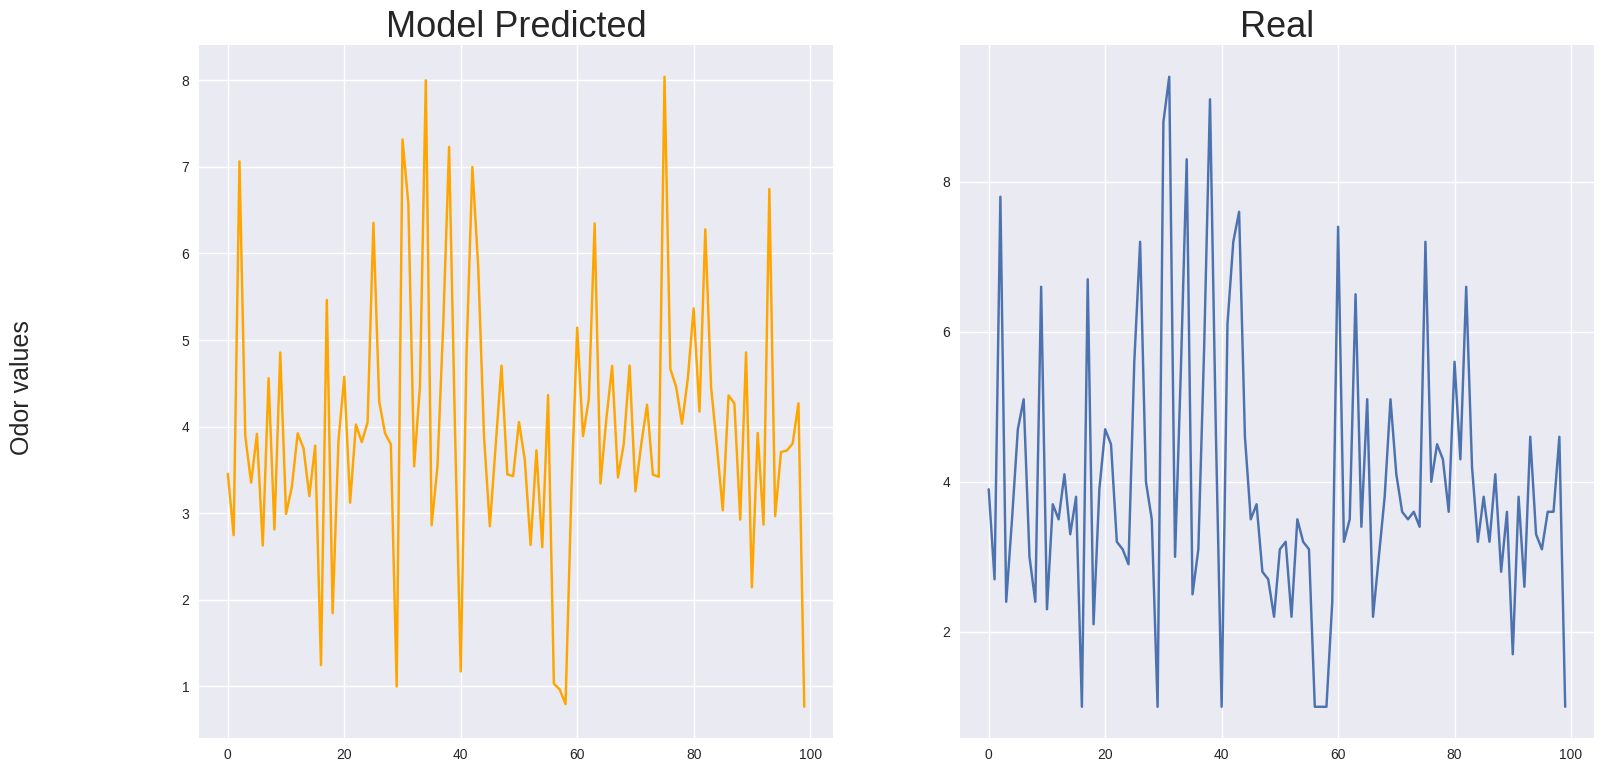

In [ ]:
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1,2)
# fig.suptitle('Predicted vs Real')
fig.supylabel("Odor values", fontsize=18)

fig.set_figheight(9)
fig.set_figwidth(18)

ax1.plot(lul[:100], y_pred[:100], color="orange")
ax1.set_title("Model Predicted", fontdict={"fontsize":26})

ax2.plot(lul[:100], y_test[:100])
ax2.set_title("Real", fontdict={"fontsize":26})

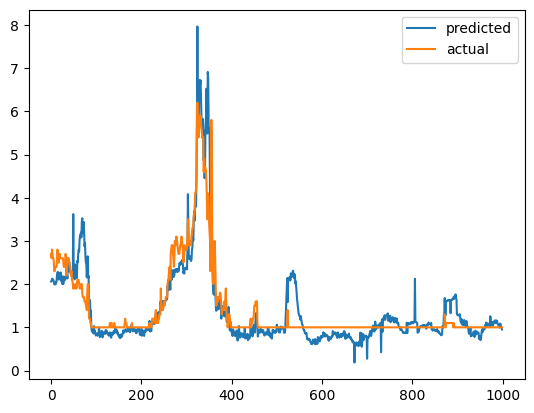

In [ ]:
predicted = y_pred
actual = y_test1
y = [x for x in range(len(actual))]
plt.plot(y, predicted, label="predicted")
plt.plot(y, actual, label="actual")
plt.legend()

In [ ]:
new_data

,ou,NH3,H2S,TVOCs,temperature,humidity
0,1.8,0.836,0.369,0.100,6.9,6.3
1,1.6,0.828,0.353,0.098,6.9,6.3
2,1.4,0.821,0.338,0.098,6.9,6.3
3,1.3,0.815,0.326,0.097,6.9,6.3
4,1.2,0.809,0.323,0.096,6.9,6.4
...,...,...,...,...,...,...
55888,4.2,0.622,0.000,0.022,24.6,8.7
55889,4.3,0.621,0.000,0.022,24.6,8.8
55890,4.1,0.623,0.000,0.022,24.5,8.8
55891,3.7,0.613,0.000,0.021,24.2,8.9


In [ ]:
new_data = data[data["ou"] != 1.0]

X3 = new_data.iloc[11000:, 1:].values
y3 = new_data.iloc[11000:, :1].values

x_test3 = new_data.iloc[10000:11000, 1:].values
y_test3 = new_data.iloc[10000:11000, :1].values

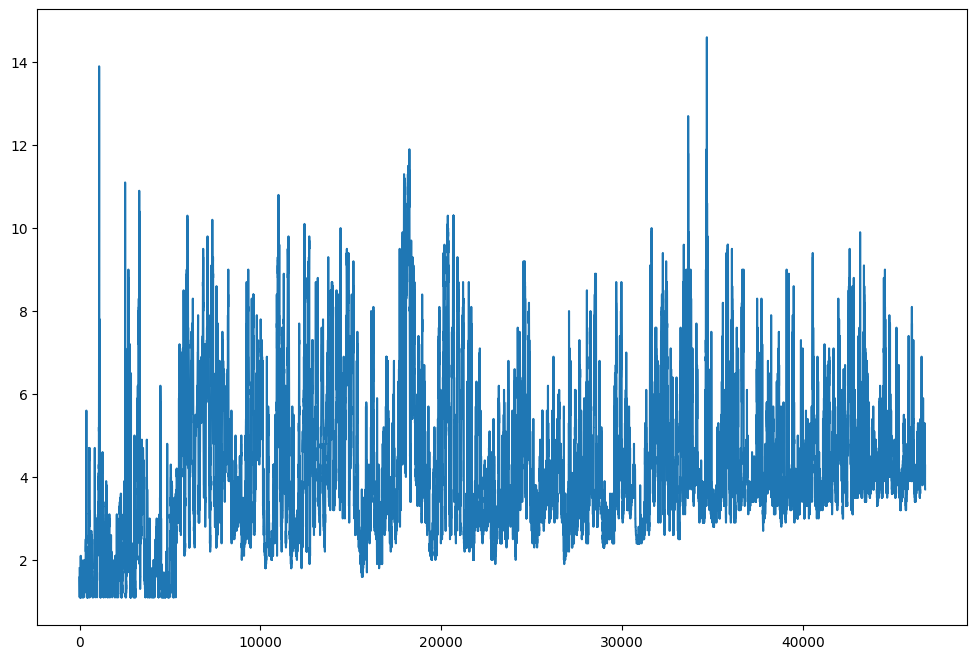

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot([x for x in range(new_data["ou"].shape[0])], new_data["ou"])
plt.show()

In [ ]:
poly1 = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans1 = poly1.fit_transform(X3)
x_test_trans1 = poly1.transform(x_test3)
#include bias parameter
lr1 = linear_model.LinearRegression()
lr1.fit(x_train_trans1, y3)
y_pred1 = lr1.predict(x_test_trans1)
print(r2_score(y_test3, y_pred1))

0.5832651577876544


##Trees

In [ ]:
from sklearn import tree
# decision tree, max_depth=no limit
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [ ]:
prediction_tree = clf.predict(x_test)
error = np.subtract(prediction_tree, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree = np.sum(np.square(error)) / x_test.shape[0]

In [ ]:
cost_tree

167.4208

In [ ]:
# decision tree, max_depth = 10000

clf_2 = tree.DecisionTreeRegressor(max_depth=10000)
clf_2 = clf_2.fit(X, y)

In [ ]:
prediction_tree_2 = clf_2.predict(x_test)
error_2 = np.subtract(prediction_tree_2, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_2 = np.sum(np.square(error_2)) / x_test.shape[0]

In [ ]:
cost_tree_2

182.636

In [ ]:
clf_3 = tree.DecisionTreeRegressor(max_depth=1000)
clf_3 = clf_3.fit(X, y)

In [ ]:
prediction_tree_3 = clf_3.predict(x_test)
error_3 = np.subtract(prediction_tree_3, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_3 = np.sum(np.square(error_3)) / x_test.shape[0]

In [ ]:
cost_tree_3

146.36880000000002

In [ ]:
clf_4 = tree.DecisionTreeRegressor(max_depth=100)
clf_4 = clf_4.fit(X, y)
prediction_tree_4 = clf_4.predict(x_test)
error_4 = np.subtract(prediction_tree_4, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_4 = np.sum(np.square(error_4)) / x_test.shape[0]

In [ ]:
cost_tree_4

176.09440000000004

#Neural network

In [ ]:
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [ ]:
X_2 = data.iloc[100:, 1:]
y_2 = data.iloc[100:, :1]

In [ ]:
model = keras.Sequential([
      layers.Input(shape=(5,1)),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

In [ ]:
%%time
history = model.fit(
    X_2,
    y_2,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11min 25s, sys: 56.7 s, total: 12min 22s
Wall time: 10min 22s


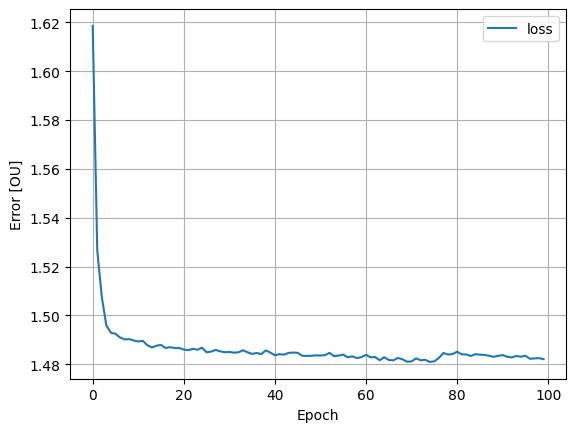

In [ ]:
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 3])
plt.xlabel('Epoch')
plt.ylabel('Error [OU]')
plt.legend()
plt.grid(True)

In [ ]:
history.history["loss"]

In [ ]:
x_test_2 = data.iloc[:100, 1:]
y_test_2 = data.iloc[:100, :1]

In [ ]:
prediction_nn = model.evaluate(x_test_2, y_test_2)
print("test loss, test acc:", prediction_nn)

4/4 [==============================] - 0s 4ms/step - loss: 1.8795
test loss, test acc: 1.8795173168182373


In [ ]:
prediction_nn

1.8795173168182373

#Cone-shaped Neural Net
